This is my capstone project for the Udacity Machine Learning Nanodegree.

Import the libraries needed.

In [1]:
import pandas as pd
import numpy as np
import keras as kr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from os import listdir

Using TensorFlow backend.


Get the data.

In [2]:
directory = 'sandp500/individual_stocks_5yr'
dir_listing = listdir(directory)

In [3]:
symbols_list = []

for symbol in dir_listing:
    symb = symbol.split('_')[0]
    symbols_list.append(symb)

print(len(symbols_list))
print(symbols_list[0])

504
AAL


In [4]:
csv_file = '{}/{}_data.csv'.format(directory, symbols_list[0])

Since we already know the name of the specific stock we are trying to get from the name of the file, we can drop that column in the dataframe.

In [5]:
dataset = pd.read_csv(csv_file)

In [6]:
dataset = dataset.assign(trading_date = pd.to_datetime(dataset['Date']))

In [7]:
dataset = dataset.drop('Name', 1)
dataset = dataset.drop('Date', 1)
dataset.set_index(['trading_date'], inplace=True)

In [20]:
def getting_preprocessed_data(symbol):
        csv_file = '{}/{}_data.csv'.format(directory, symbol)
        df = pd.read_csv(csv_file)
        df = df.drop('Name', 1)
        df.set_index('Date', inplace=True)
        # below was found at https://stackoverflow.com/questions/29314033/python-pandas-dataframe-remove-empty-cells
        df['Open'].replace('', np.nan, inplace=True)
        df.dropna(subset=['Open'], inplace=True)
        return df

def plotting_stocks(symbols_list, amount_of_stocks=0):
    if amount_of_stocks == 0:
        amount_of_stocks = len(symbols_list)
        
    for symbol in symbols_list[:amount_of_stocks]:
        fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.7)
        df = getting_preprocessed_data(symbol)
        print(symbol)
        df.Open.plot(ax=ax, style='b-', figsize=(20,10))
        # same ax as above since it's automatically added on the right
        df.Volume.plot(ax=ax, style='r-', secondary_y=True, figsize=(20,10))
        # add legend --> take advantage of pandas providing us access
        # to the line associated with the right part of the axis
        #ax.legend([ax.get_lines()[0], ax.get_lines()[0]], ['Open','Volume'], bbox_to_anchor=(1.5, 0.5))
        plt.show()
        #below is the Daily Returns calculation to put into the Sharpe Ratio. 
        df_preprocessed = df.assign(Daily_Returns = np.divide((df.Open - df.Close), df.Close) * 100)

        #Below is the calculation for the Sharpe Ratio column. 
        df_preprocessed = df_preprocessed.assign(Sharpe_Ratio = np.divide((df_preprocessed.Daily_Returns - 0.046), np.std(np.array([df_preprocessed.Open, df_preprocessed.High, df_preprocessed.Low, df_preprocessed.Close]))))

        #Below is the rate of change (momentum) for the specific stock. 
        df_preprocessed = df_preprocessed.assign(Rate_of_Change = (np.divide(df_preprocessed.Close, df_preprocessed.Open) - 1) * 100)

        #df.plot.scatter(x='Open', y='Volume', label="AAL")
        log_df = np.log(df)
        log_df_preprocessed = np.log(df_preprocessed)
        log_df_preprocessed.plot.scatter(x='Volume', y='Open', label="AAL", figsize=(20,10))
        plt.show()
        log_df_preprocessed.plot.scatter(x='Open', y='Sharpe_Ratio', label="Sharpe Ratio Open", figsize=(20,10))
        plt.show()
        log_df_preprocessed.plot.scatter(x='Volume',y='Sharpe_Ratio', label="Sharpe Ratio Volume", figsize=(20,10), use_index=True)
        plt.show()
        log_df_preprocessed.plot.scatter(x='Volume',y='Close', label="Volume Close", figsize=(20,10), use_index=True)
        plt.show()

AAL


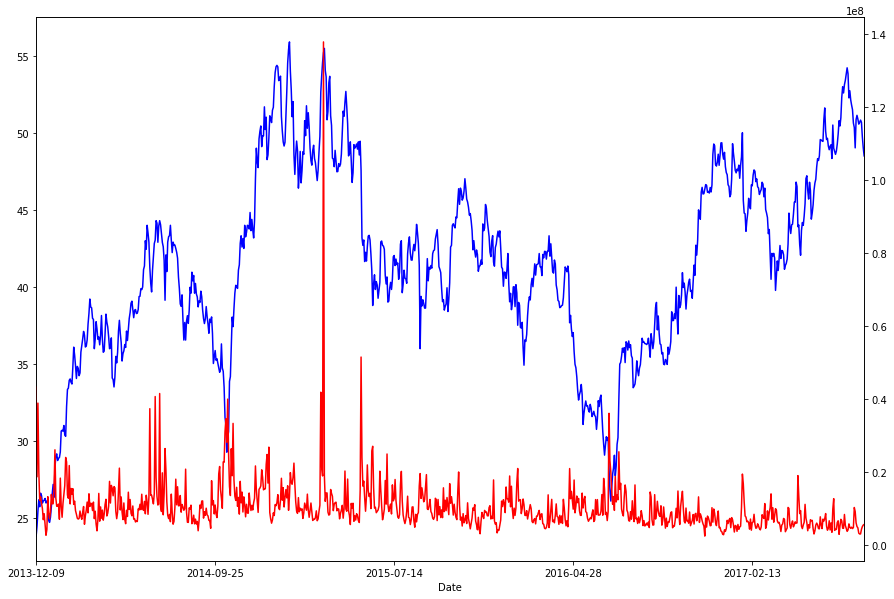

/home/kevin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/home/kevin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log


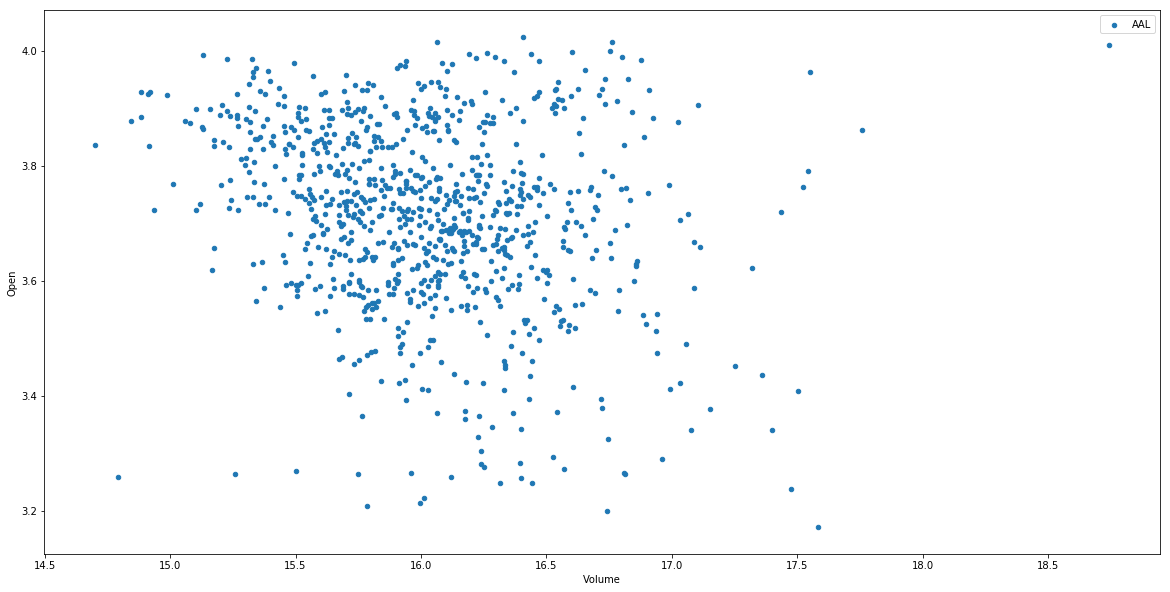

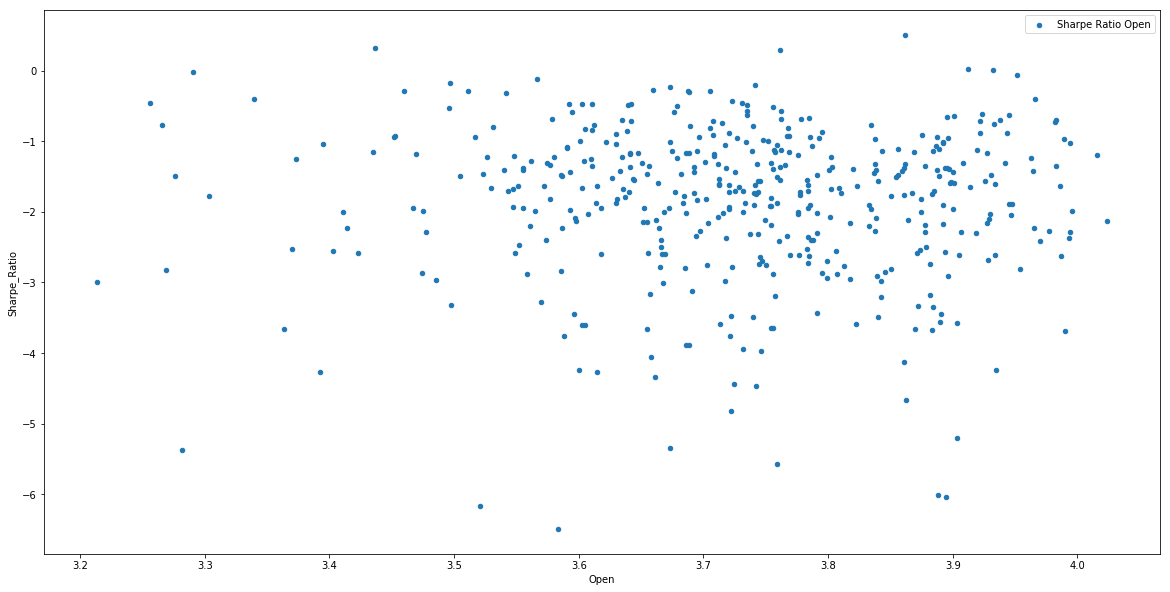

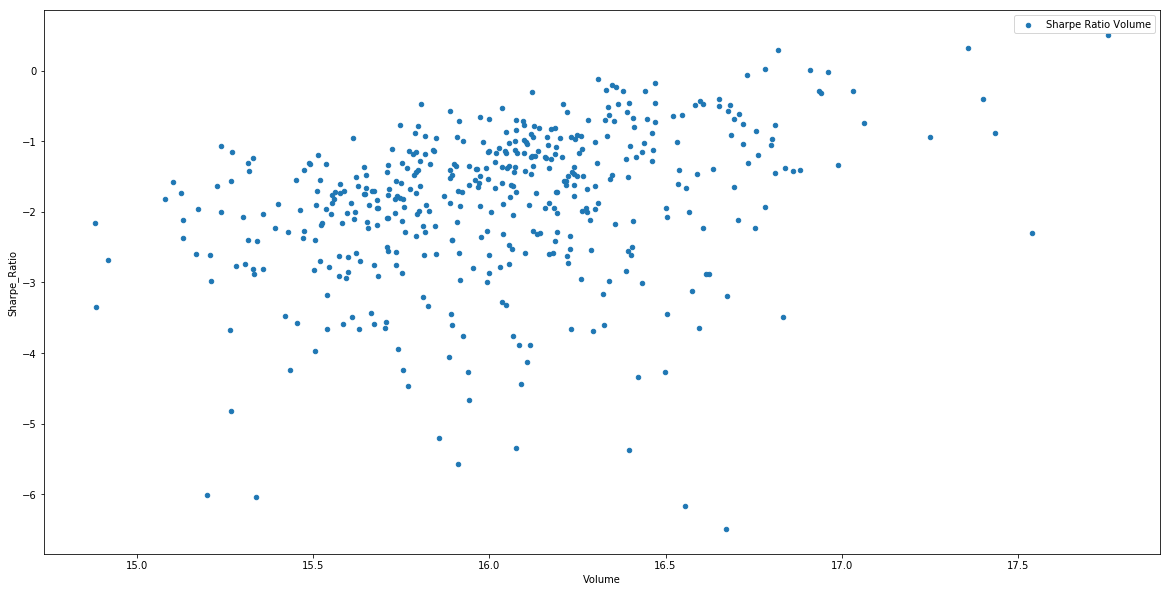

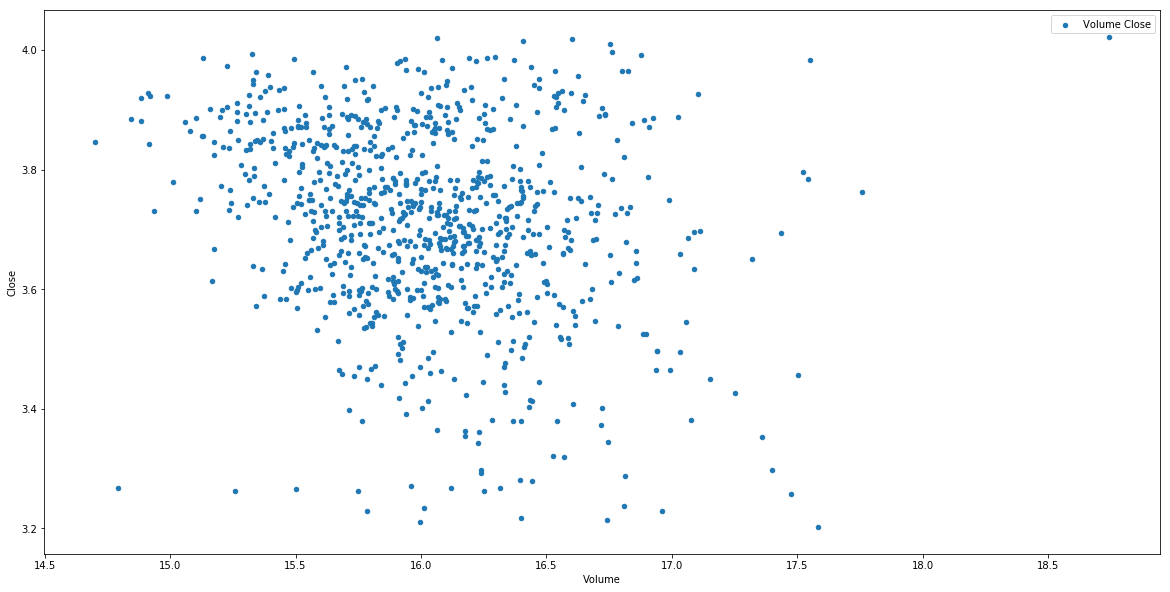

In [21]:
# printing out the first four stocks to get an idea of how each stock is individually represented.
plotting_stocks(symbols_list, 1)

In [10]:
#below is the Daily Returns calculation to put into the Sharpe Ratio. 
dataset_preprocessed = dataset.assign(Daily_Returns = np.divide((dataset.Open - dataset.Close), dataset.Close) * 100)

In [11]:
#Below is the calculation for the Sharpe Ratio column. 
dataset_preprocessed = dataset_preprocessed.assign(Sharpe_Ratio = np.divide((dataset_preprocessed.Daily_Returns - 0.046), np.std(np.array([dataset_preprocessed.Open, dataset_preprocessed.High, dataset_preprocessed.Low, dataset_preprocessed.Close]), ddof=1)))

In [12]:
#Below is the rate of change for the specific stock also known as momentum
dataset_preprocessed = dataset_preprocessed.assign(Rate_of_Change = (np.divide(dataset_preprocessed.Close, dataset_preprocessed.Open) - 1) * 100)

In [24]:
dataset_preprocessed

,Open,High,Low,Close,Volume,Daily_Returns,Sharpe_Ratio,Rate_of_Change
trading_date,,,,,,,,
2013-12-09,23.85,25.44,23.45,24.60,43197268,-3.048780,-0.490892,3.144654
2013-12-10,24.50,25.17,24.41,24.88,18660625,-1.527331,-0.249561,1.551020
2013-12-11,25.48,27.20,25.37,25.99,38843371,-1.962293,-0.318554,2.001570
2013-12-12,26.20,26.71,25.45,25.45,19981824,2.946955,0.460147,-2.862595
2013-12-13,25.75,26.30,25.52,26.23,12192421,-1.829966,-0.297564,1.864078
2013-12-16,26.63,26.77,26.35,26.61,13190945,0.075160,0.004625,-0.075103
2013-12-17,26.48,26.59,25.95,26.10,11413199,1.455939,0.223643,-1.435045
2013-12-18,25.99,26.23,25.55,26.23,9994162,-0.914983,-0.152430,0.923432
2013-12-19,26.12,26.49,25.82,26.12,6916497,0.000000,-0.007296,0.000000
